<a href="https://colab.research.google.com/github/PepoAmbriz/P1-Cosmology/blob/main/P1Cosmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aproximación numérica del factor de escala para obtener cantidades importantes en la historia de evolución de el universo.**

In [ ]:
import numpy as np
import sympy as sy
import math as ma
import matplotlib.pyplot as plt
from scipy import constants as cte
import random
import pandas as pd


Universo con solo materia  
Eq(y(t), 1.31037069710445*(C1 + 0.561515805654658*t)**0.666666666666667)
Universo con solo radiación 
Eq(y(t), 1.4142135623731*(C1 + 0.00948683298050514*t)**0.5)
Universo con solo energía oscura 
Eq(Integral((_y**2)**(-0.5), (_y, y(t))), C1 + 0.82746601138657*t)


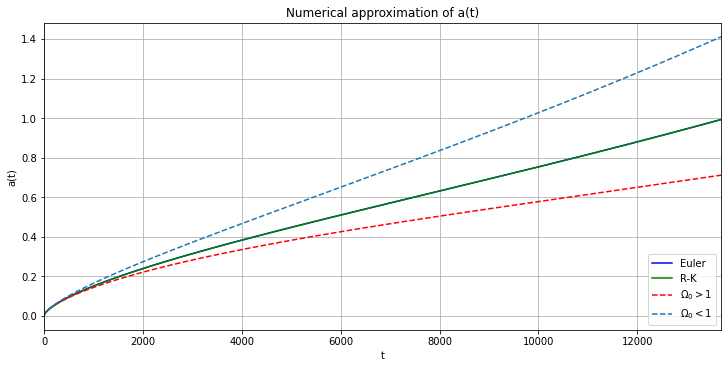

In [ ]:
#Soluciones a la ecuación de Friedmann para a(t)

#aquí pondré las constantes 
Ho= 67.36*3600*24*365*10**6                            #Convertida a Maños
Ho= Ho/(3.086E19)                                #quitamos unidades de longitud 
#Omegas
Om= 0.3153
Or= 9E-5
OA= 0.6847 
Oo=1
#Variables
t=sy.Symbol('t', positive=True) 
y=sy.Function('y')
#Ecuación

f1=( Om / (y(t)) + Or / (y(t))**2 + OA * (y(t))**2 + (1-Oo))**0.5*Ho
fm=( Om / (y(t)) )**0.5
fr=( Or / (y(t))**2)**0.5
fA=( OA * (y(t))**2)**0.5

#Soluciones particulares
print("Universo con solo materia  ")
print(sy.dsolve(y(t).diff(t) - fm))
print("Universo con solo radiación ")
print(sy.dsolve(y(t).diff(t) - fr))
print("Universo con solo energía oscura ")
print(sy.dsolve(y(t).diff(t) - fA))
 
##########    Runge Kutta para solución numérica  ##################
#definimos la función
def f(x,w):
  return ( Om/w + Or/w**2 + OA*w**2 +(1-Oo) )**0.5*Ho

a=0
b=13700
N=13700

alp=1E-4           #Condicion inicial de a (Suponiendo una relación lineal)
W1=np.zeros(N+1)
h=(b-a)/N
x=a
w=alp

for i in range(1,N+1):
  K0 = h*f(x,w)
  K1 = h*f(x + h/2.0, w + K0/2.0)
  K2 = h*f(x + h/2.0, w + K1/2.0)
  K3 = h*f(x + h, w + K2)
  w=w+(K0+2*K1+2*K2+K3)/6
  x=a+i*h
  W1[i]=w
  

##############################Euler############################################
W2=np.zeros(N+1)
T=np.zeros(N+1)
x=a
w=alp
for i in range(1,N+1):
  w += h*f(x,w)
  x=a+i*h
  W2[i]=w
  T[i]=x
 
#Gráficos
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
plt.plot(T, W2, "-b", label = "Euler")
plt.plot(T, W1, "-g", label = "R-K")
# Euler con curvatura positiva
Oo=1.5
W3=np.zeros(N+1)
T=np.zeros(N+1)
x=a
w=alp
for i in range(1,N+1):
  w += h*f(x,w)
  x=a+i*h
  W3[i]=w
  T[i]=x
plt.plot(T, W3, "--r", label = "$\Omega_0>1$")
#Euler con curvatura negativa
Oo=0
W4=np.zeros(N+1)
T=np.zeros(N+1)
x=a
w=alp
for i in range(1,N+1):
  w += h*f(x,w)
  x=a+i*h
  W4[i]=w
  T[i]=x

plt.plot(T, W4, "--", label = "$\Omega_0<1$")
plt.xlim([a-0.1,b+0.1])
plt.xlabel("t")
plt.ylabel("a(t)")
plt.legend(loc = "lower right")
plt.title("Numerical approximation of a(t)")
plt.grid()  



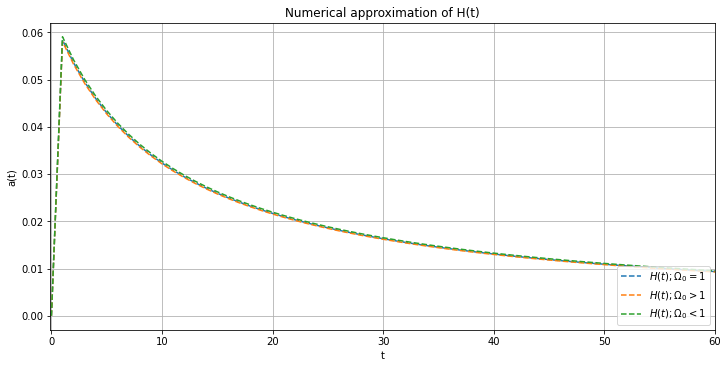

In [ ]:

#Gráfico de H(t)
#W2=np.linspace(0,1,N+1)
N=13700
H1=np.zeros(N+1)
H2=np.zeros(N+1)
H3=np.zeros(N+1)
for i in range(1,N+1):
  H1[i]= Ho*(Om/W2[i]**3+Or/W2[i]**4+OA)**0.5
  H2[i]= Ho*(Om/W3[i]**3+Or/W3[i]**4+OA+(1-1.5)/W3[i]**2)**0.5
  H3[i]= Ho*(Om/W4[i]**3+Or/W4[i]**4+OA+(1)/W4[i]**2)**0.5

fig2, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
plt.plot(T, H1, "--", label = "$H(t) ; \Omega_0=1$")
plt.plot(T, H2, "--", label = "$H(t) ; \Omega_0>1$")
plt.plot(T, H3, "--", label = "$H(t) ; \Omega_0<1$")
plt.xlim([a-0.1,60])
plt.xlabel("t")
plt.ylabel("a(t)")
plt.legend(loc = "lower right")
plt.title("Numerical approximation of H(t)")
plt.grid() 

Text(0.5, 0, 'Z')

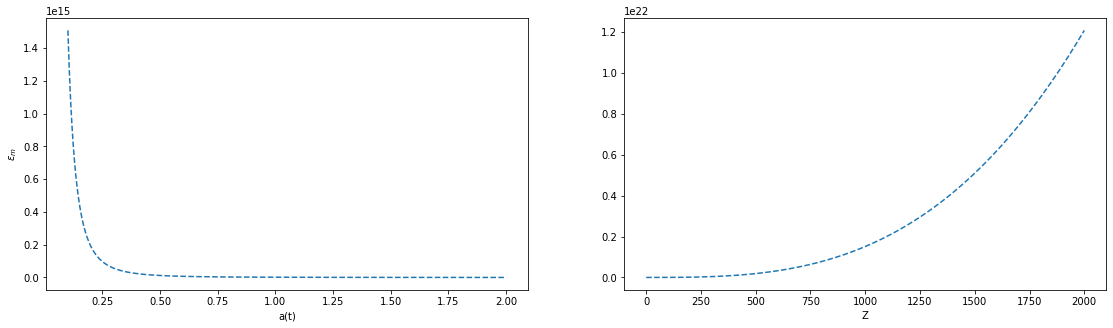

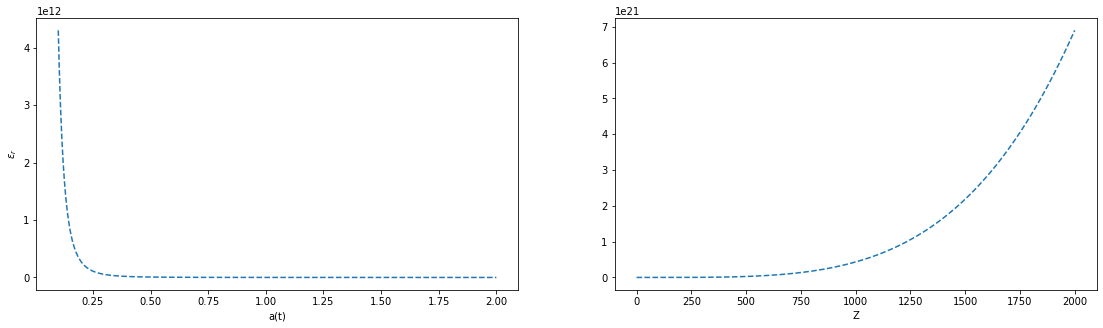

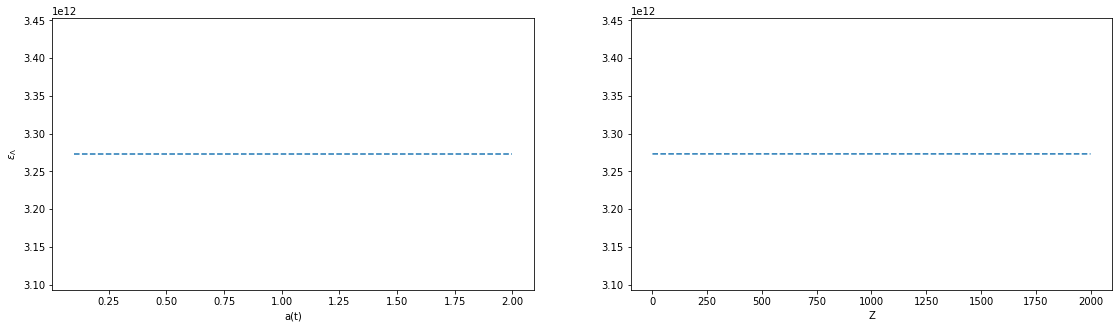

In [ ]:

#Gráficas de evolución para densidad energética
#Primero definimos las constantes necesarias 
Ho= 67.36                          
Ho= Ho/(3.086E19) 
eps_c0= (3*cte.c**2*Ho**2)/(8*np.pi*cte.G)*((1000**3)/(1.602e-13))
eps_0=[Om*eps_c0 ,Or*eps_c0 ,OA*eps_c0]
wj=[0 ,1/3 ,-1]
a1=a=np.linspace(0.1,2000,10000)
a=np.linspace(0.1,2,1000)  #a va de 0 a 1
#Definimos la funcion epsilon
def eps(a,e0,wi):
  return e0 *(a**(-3*(1+wi)))
#Función de z
def epsz(z,e0,wi):
  return e0 *((1/(1+z))**(-3*(1+wi)))
#Densidades individuales
figure, axes = plt.subplots(1,2)
figure.set_size_inches(19,5)
axes[0].plot(a, eps(a,eps_0[0],wj[0]), "--")
axes[0].set_ylabel("$\epsilon_m$")
axes[1].plot(a1, epsz(a1,eps_0[0],wj[0]), "--")
axes[0].set_xlabel("a(t)")
axes[1].set_xlabel("Z")

figure1, axes = plt.subplots(1,2)
figure1.set_size_inches(19,5)
axes[0].plot(a, eps(a,eps_0[1],wj[1]), "--")
axes[0].set_ylabel("$\epsilon_r$")
axes[1].plot(a1, epsz(a1,eps_0[1],wj[1]), "--")
axes[0].set_xlabel("a(t)")
axes[1].set_xlabel("Z")


figure2, axes = plt.subplots(1,2)
figure2.set_size_inches(19,5)
axes[0].plot(a, eps(a,eps_0[2],wj[2]), "--")
axes[0].set_ylabel("$\epsilon_\Lambda$")
axes[1].plot(a1, epsz(a1,eps_0[2],wj[2]), "--")
axes[0].set_xlabel("a(t)")
axes[1].set_xlabel("Z")


In [ ]:
#Aqui voy a graficar las densidades en el mismo plot 


In [ ]:

#Graph of diferent distances

c=cte.c*3600*24*365*10**6/3.086e22    #C en Maños y Mpc

#We make some definitions
#Lagrange interpolation
def lagrange(xL,yL):
  n = len(xL)
  t = sy.Symbol('t') #symbolic variable
  poli = 0
  for i in range(n):
    num = 1
    denom = 1
    for j  in range(n):
      if (j!=i):
        num = num*(t - xL[j])
        denom = denom*(xL[i] - xL[j])
    poli = poli + (num/denom)*yL[i]
  polisimp = sy.expand(poli)            #simple expression for the polynom
  px = sy.lambdify(t,poli)               #for numerical evaluation
  return px, polisimp


valores=[0,13700]
for i in range(30):
  num = random.randint(1,13700)
  valores.append(num)
valores.sort()

a2, T2 = [], []
for i in valores:      
  a2.append(W2[i])
  T2.append(T[i])
Pn, apoli=lagrange(T2,a2)   #Function,character

In [ ]:
print(apoli)


4.97624856136174e-120*t**31 - 1.14456875491139e-114*t**30 + 1.40580876226024e-109*t**29 - 1.04367139106138e-104*t**28 + 5.54994644417108e-100*t**27 - 2.21217467271494e-95*t**26 + 6.97523363588714e-91*t**25 - 1.86369505097848e-86*t**24 + 4.25851076031786e-82*t**23 - 7.52108276500871e-78*t**22 + 1.13991790781333e-73*t**21 - 1.46991899989797e-69*t**20 + 1.77244511970218e-65*t**19 - 1.66799734960063e-61*t**18 + 1.46190767090881e-57*t**17 - 1.08245206965556e-53*t**16 + 6.8771475128626e-50*t**15 - 3.97212695691064e-46*t**14 + 1.82299268686256e-42*t**13 - 7.73639484841713e-39*t**12 + 2.79654441103538e-35*t**11 - 8.39048421680226e-32*t**10 + 2.18471569922025e-28*t**9 - 4.83577347806636e-25*t**8 + 8.68971814045546e-22*t**7 - 1.28263795974953e-18*t**6 + 1.55416048661503e-15*t**5 - 1.46386571064561e-12*t**4 + 1.06240279358735e-9*t**3 - 5.86338125035252e-7*t**2 + 0.000334752080952239*t


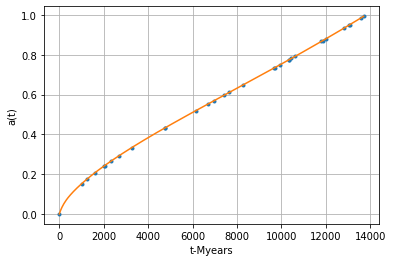

In [ ]:
x=np.linspace(0,13700,N+1)
plt.plot(T2,a2,".")
plt.plot(x,Pn(x),label="a(t)-approx")
plt.ylabel("a(t)")
plt.xlabel("t-Myears")
plt.grid()
plt.show()

In [ ]:
#To integrate we define the simpson rule
def simps(f,a,b,n):
  h = (b-a)/n
  Xl0 = f(a) + f(b)
  Xl1 = 0.
  Xl2 = 0.
  for i in range(1,n):
    X = a + i*h
    if i%2 == 0:
      Xl2 += f(X)
    else:
      Xl1 += f(X)         
  Xl = h*(Xl0 + 2.*Xl2 + 4.*Xl1) / 3
  return Xl

#Then to obtain an area as a function of t
#this function returns an array of areas 
def intfunction(f,A,B,N):
  yint=np.zeros(N+1)
  a=A
  h=(B-A)/N
  b=h         #only works if interval is next to 0
  for i in range(1,N+1):
    yint[i]=simps(f,a,b,20)
    b=i*h
  return yint

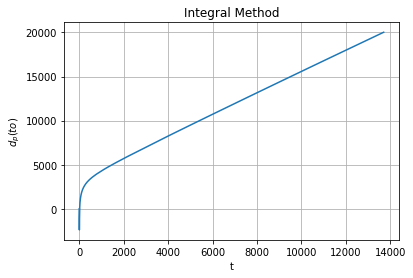

In [ ]:
def zt(t):
  Z=1/Pn(t)-1
  return Z
#define proper distance
def pd(t):
  return c/Pn(t)
#define pdZ
def pdZ(t):
  return c+c*zt(t)
#Prueba 
A=1
B=1000
N=13700
T=np.zeros(N+1)

for i in range (1,N+1):    #def z array
  T[i]=i
 
Y=intfunction(pdZ,A,B,N)
plt.plot(T,Y)

plt.ylabel("$d_p(to)$")
plt.xlabel("t")
plt.title("Integral Method")
plt.grid()
plt.show()

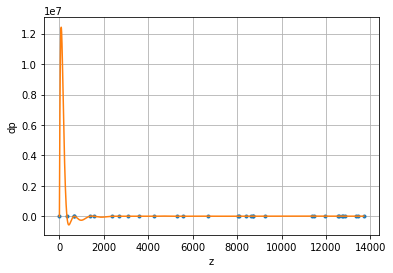

4.5077894251355e-107*t**31 - 1.02448730223352e-101*t**30 + 1.11151464681656e-96*t**29 - 7.6623800243626e-92*t**28 + 3.7686368154011e-87*t**27 - 1.40774327686793e-82*t**26 + 4.15105750254532e-78*t**25 - 9.91508080032386e-74*t**24 + 1.95333137064567e-69*t**23 - 3.21532364612622e-65*t**22 + 4.46390140942562e-61*t**21 - 5.26213019437326e-57*t**20 + 5.29147652351657e-53*t**19 - 4.55226924026777e-49*t**18 + 3.35537131706701e-45*t**17 - 2.11913844769888e-41*t**16 + 1.14544928792092e-37*t**15 - 5.28603859577446e-34*t**14 + 2.07484885859369e-30*t**13 - 6.89094212736509e-27*t**12 + 1.92320086218561e-23*t**11 - 4.4708935300246e-20*t**10 + 8.56079442155163e-17*t**9 - 1.3309941352818e-13*t**8 + 1.64965879170549e-10*t**7 - 1.5910851449723e-7*t**6 + 0.000115585711271987*t**5 - 0.0603819776783183*t**4 + 21.1254321694032*t**3 - 4365.91920250189*t**2 + 395928.59246999*t


In [ ]:
#to use dp as a function we interpolate
valores=[0,13700]
for i in range(30):
  num = random.randint(1,13700)
  valores.append(num)
valores.sort()

a2, T2 = [], []
for i in valores:      
  a2.append(Y[i])
  T2.append(T[i])
Pdp, polipd=lagrange(T2,a2)   #Function,character
x=np.linspace(0,13700,5000)
plt.plot(T2,a2,".")
plt.plot(x,Pdp(x),label="dp(t)-approx")
plt.ylabel("dp")
plt.xlabel("z")
plt.grid()
plt.show()
print(polipd)

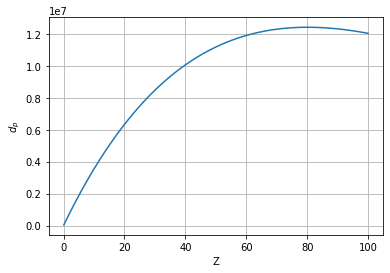

In [ ]:
def dpf(t):
  return Pdp(t)
z=np.linspace(0.1,100,14000)
plt.plot(z,dpf(z))
plt.ylabel("$d_p$")
plt.xlabel("Z")

plt.grid()
plt.show()

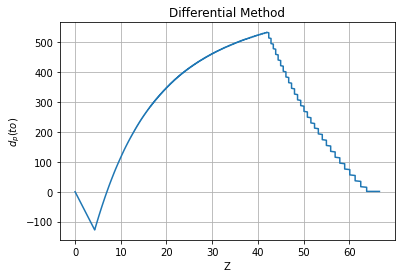

In [ ]:

#Solving with Euler, diferential approximation, doesnt work very well
def Dpd(to,w):
  return c*((Z[to])-(Z[to-50]))
a=20
b=1400
N=13700
alp=1
h=(b-a)/N
Dp=np.zeros(N+1)
T=np.zeros(N+1)
Z=np.zeros(N+1)
x=xi=a
w=alp
for i in range(0,N):
  w += h*Dpd(xi,w)
  xi=int(a+i*h)
  x=a+i*h
  Dp[i]=w
  T[i]=xi
  Z[i]=1/(W2[xi])-1


plt.plot(Z,Dp)
plt.ylabel("$d_p(to)$")
plt.xlabel("Z")
plt.title("Differential Method")
plt.grid()
plt.show()

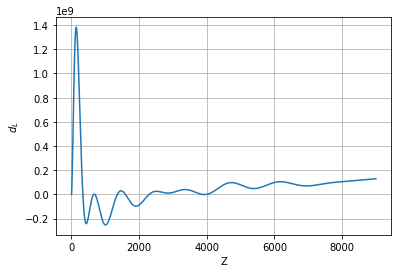

In [ ]:

#Luminosity Distance
def dL(z):
  return dpf(z)*(1+z)

z=np.linspace(1,9000,14000)
plt.plot(z,dL(z))
plt.ylabel("$d_L$")
plt.xlabel("Z")

plt.grid()
plt.show()

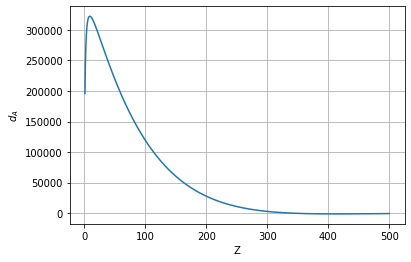

In [ ]:
#Angular distance 
def dA(z):
  return dL(z)/(1+z)**2
z=np.linspace(1,500,100000)

plt.plot(z,dA(z))
plt.ylabel("$d_A$")
plt.xlabel("Z")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


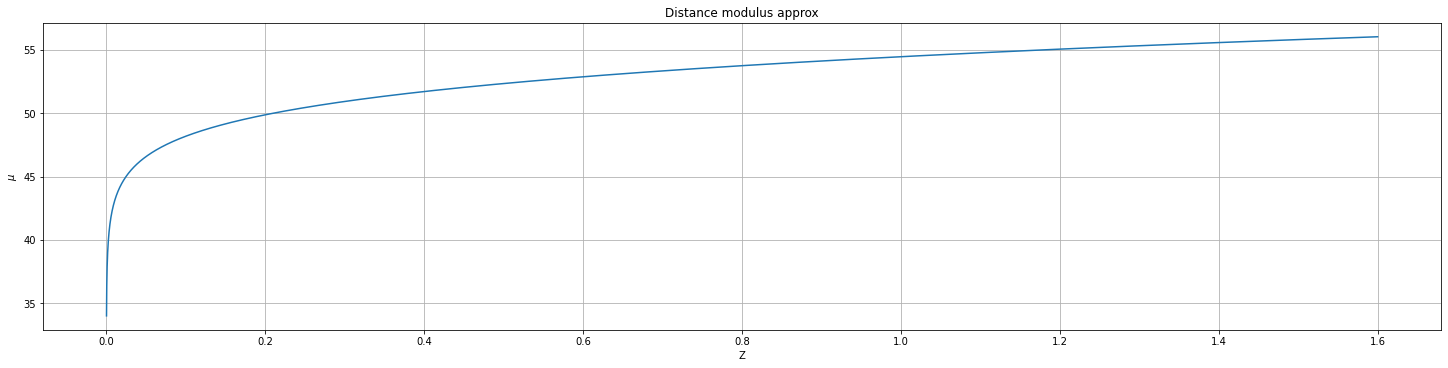

In [ ]:

#Modulus distance
def modulus(z):
  return 5*np.log10(dL(z))+25

z=np.linspace(0,1.6,10000)
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
plt.plot(z,modulus(z))
plt.ylabel("$\mu$")
plt.xlabel("Z")
plt.title('Distance modulus approx')
plt.grid()
plt.show()

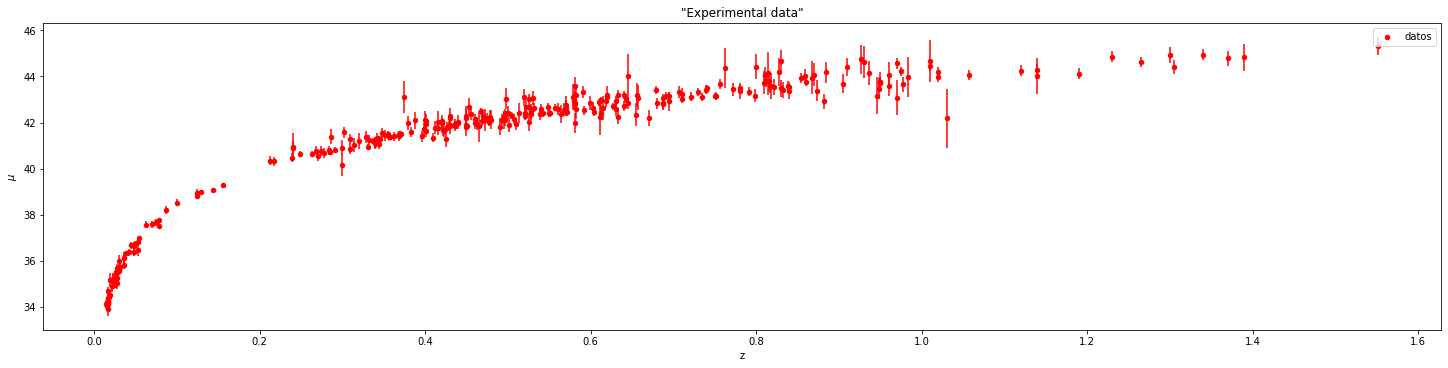

In [ ]:
import pandas as pd
import matplotlib.cm as cm 
import itertools
#Creamos un data frame
dataf = pd.read_table('/data.txt', delimiter='\t')   #NO ESTÁ EN DRIVE
dataf.columns=['name', 'redshift', 'distance modulus', 'error']
#Graficamos los datos
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
dataf.plot(ax=ax, x='redshift', y='distance modulus', yerr='error', kind="scatter", label="datos",color="red")
plt.title('"Experimental data"')
ax.set_xlabel("z")
ax.set_ylabel("$\mu$")
ax.legend(loc=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


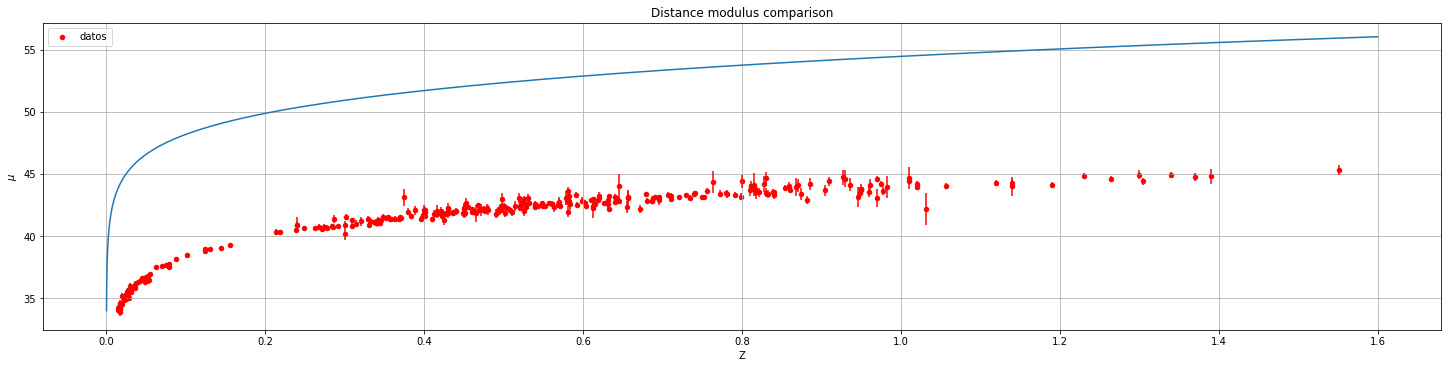

In [ ]:
#Graficamos los datos
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
dataf.plot(ax=ax, x='redshift', y='distance modulus', yerr='error', kind="scatter", label="datos",color="red")
plt.title('"Experimental data"')
ax.set_xlabel("z")
ax.set_ylabel("$\mu$")
ax.legend(loc=0)
plt.plot(z,modulus(z))
plt.ylabel("$\mu$")
plt.xlabel("Z")
plt.title('Distance modulus comparison')
plt.grid()
plt.show()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


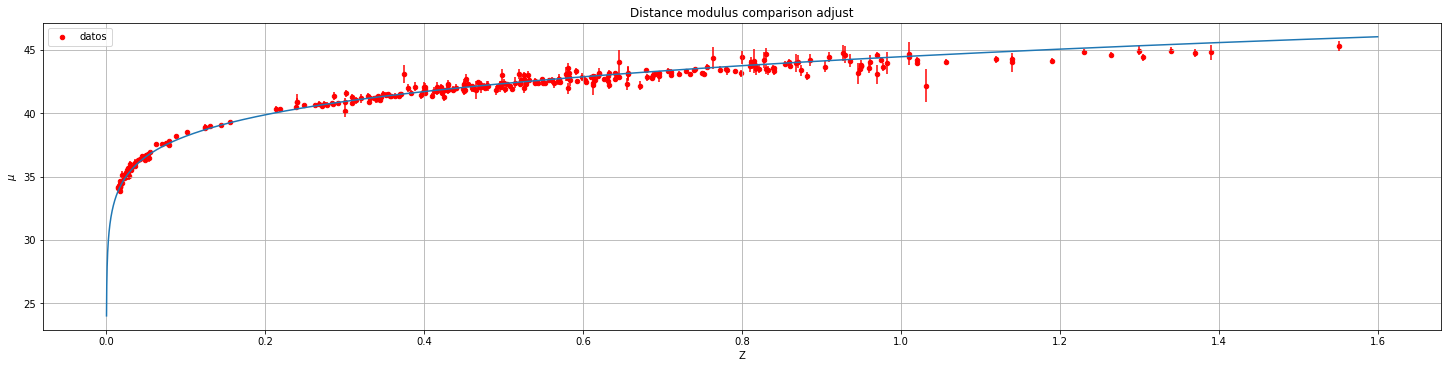

In [ ]:
#Graficamos los datos
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
dataf.plot(ax=ax, x='redshift', y='distance modulus', yerr='error', kind="scatter", label="datos",color="red")
plt.title('"Experimental data"')
ax.set_xlabel("z")
ax.set_ylabel("$\mu$")
ax.legend(loc=0)
plt.plot(z,modulus(z)-10)
plt.ylabel("$\mu$")
plt.xlabel("Z")
plt.title('Distance modulus comparison adjust')
plt.grid()
plt.show()
plt.show()

Por lo que entendí en clase, el término -10 del $\mu$ aparece cuando hacemos los cambios de unidades, el hecho de que tenga que sumar 11, me parece que implica el hecho de que seguramente hice una conversión mal por ahi xd .

Sin embargo, parece ser distinto en cada ejecución, lo que implica un problema de convergencia en las aproximaciones numéricas por lo que se podría reformular el modelo matemático.